In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combineddata = pd.merge(ridedata, citydata, how='outer', on='city')
dupdata = pd.merge(ridedata, citydata, how='outer', on='city')

# Display the data table for preview
dupdata.drop_duplicates(subset='city', keep='first', inplace=True)
dupdata.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
24,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
55,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
80,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
103,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
rural = combineddata.loc[combineddata['type'] == "Rural"]
rural2 = dupdata.loc[combineddata['type'] == "Rural"]
rural_drivers = rural2[["city", 'driver_count']].set_index('city')
rural_cities = rural.groupby(['city'])

urban = combineddata.loc[combineddata['type'] == "Urban"]
urban2 = dupdata.loc[combineddata['type'] == "Urban"]
urban_drivers = urban2[["city", 'driver_count']].set_index('city')
urban_cities = urban.groupby(['city', 'driver_count'])

suburban = combineddata.loc[combineddata['type'] == "Suburban"]
suburban2 = dupdata.loc[combineddata['type'] == "Suburban"]
suburban_drivers = suburban2[["city", 'driver_count']].set_index('city')
suburban_cities = suburban.groupby(['city', 'driver_count'])

rural_df = pd.DataFrame({"Total Rides": rural_cities['ride_id'].count(), "Average Fare": rural_cities["fare"].mean()})
rural_final = pd.merge(rural_drivers, rural_df, on='city')

urban_df = pd.DataFrame({"Total Rides": urban_cities['ride_id'].count(), "Average Fare": urban_cities["fare"].mean()})
urban_final = pd.merge(urban_drivers, urban_df, on='city')

suburban_df = pd.DataFrame({"Total Rides": suburban_cities['ride_id'].count(), "Average Fare": suburban_cities["fare"].mean()})
suburban_final = pd.merge(suburban_drivers, suburban_df, on='city')


## Bubble Plot of Ride Sharing Data

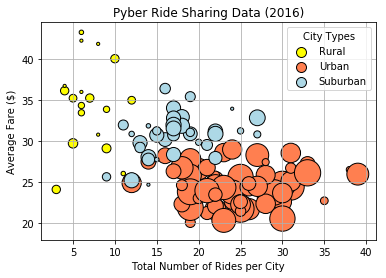

In [46]:
# Obtain the x and y coordinates for each of the three city types
rural_x = rural_final['Total Rides']
rural_y = rural_final['Average Fare']
rural_s = rural_final['driver_count']

urban_x = urban_final['Total Rides']
urban_y = urban_final['Average Fare']
urban_s = urban_final['driver_count']

suburban_x = suburban_final['Total Rides']
suburban_y = suburban_final['Average Fare']
suburban_s = suburban_final['driver_count']

# Build the scatter plots for each city types
plt.scatter(rural_x, rural_y, marker="o", facecolors="yellow", edgecolors="black", s=10*rural_s, label="Rural")
plt.scatter(urban_x, urban_y, marker="o", facecolors="coral", edgecolors="black", s=10*urban_s, label="Urban")
plt.scatter(suburban_x, suburban_y, marker="o", facecolors="lightblue", edgecolors="black", s=10*suburban_s, label="Suburban")
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(title="City Types", loc="best")
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
legend.legendHandles[2]._sizes = [100]


# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/pyberplot.png")
plt.show()

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

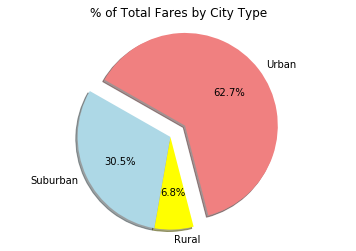

In [45]:
# Calculate Type Percents
rural_fares = rural['fare'].sum()
urban_fares = urban['fare'].sum()
suburban_fares = suburban['fare'].sum()

# Build Pie Chart
types = ["Rural", "Urban", "Suburban"]
fares = [rural_fares, urban_fares, suburban_fares]
colors = ["yellow", "lightcoral", "lightblue"]
explode = (0, 0.2, 0)
plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%2.1f%%", shadow=True, startangle=260)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/farespie.png")
plt.show()

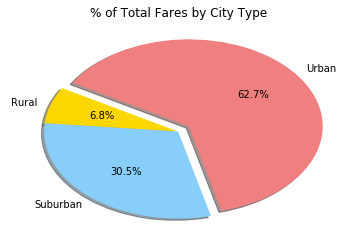

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

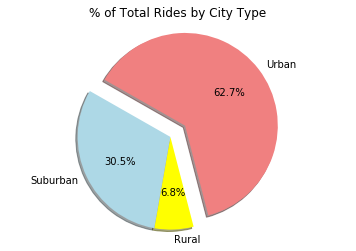

In [44]:
# Calculate Ride Percents
rural_rides = rural['ride_id'].count()
urban_rides = urban['ride_id'].count()
suburban_rides = suburban['ride_id'].count()

# Build Pie Chart
types = ["Rural", "Urban", "Suburban"]
rides = [rural_rides, urban_rides, suburban_rides]
colors = ["yellow", "lightcoral", "lightblue"]
explode = (0, 0.2, 0)
plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%2.1f%%", shadow=True, startangle=260)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/ridespie.png")
plt.show()

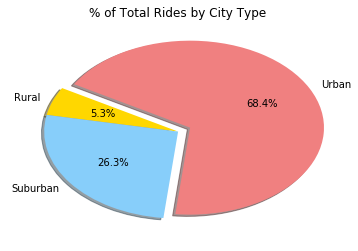

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

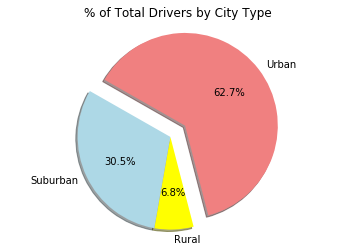

In [43]:
# Calculate Driver Percents
rdrivers = rural_final['driver_count'].sum()
udrivers = urban_final['driver_count'].sum()
sdrivers = suburban_final['driver_count'].sum()

# Build Pie Charts
types = ["Rural", "Urban", "Suburban"]
drivers = [rdrivers, udrivers, sdrivers]
colors = ["yellow", "lightcoral", "lightblue"]
explode = (0, 0.2, 0)
plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%2.1f%%", shadow=True, startangle=260)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

#Do not understand why my percentages are off here.... all the counts are correct

# Save Figure
plt.savefig("../Images/driverspie.png")
plt.show()

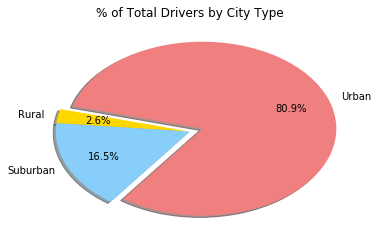

In [6]:
# Show Figure
plt.show()